## Outliners, Linear Regressions, and Correlations 

In [30]:
# import Dependencies
import pandas as pd
import csv as csv

import  numpy as np
import scipy as sts
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [31]:
# Path csv
path = "../Resources/csv_files/movie_list.csv"

# Read in csv
csv = pd.read_csv(path)

# Need to fill empty sections with "Nan" so that we can use .dropna and remove rows with empty data
nan_value = float("NaN")
# Use .replace to replace " "(empty data), with nan_value, inplace=True
csv.replace(" ", nan_value, inplace=True)
# Use .dropna with inplace=True to drop NaN values
csv.dropna(inplace=True)

In [32]:
# Creat clean csv 
clean_csv = csv
#clean_csv.head()

# Save clean_csv
clean_csv.to_csv("../Resources/clean_csv.csv")

## Check for any Outliers for Total Profit amounts

In [33]:
# Confirm all data is equal
#clean_csv.count() # 563 total count

# Sort "Profit%" for quartile data
sorted_csv = clean_csv.sort_values("Profit%", ascending=True)

# Set variable to check for outliers
profit = sorted_csv["Profit%"]

<Figure size 504x360 with 0 Axes>

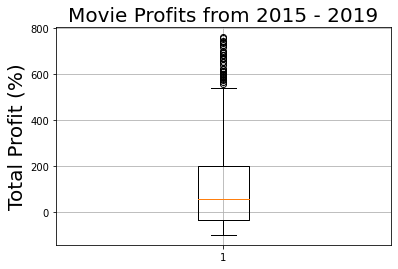

Values below -386.36999999999995 could be outliers.
Values above 553.75 could be outliers.


<Figure size 432x288 with 0 Axes>

In [51]:
# Set up for plot
plt.figure(figsize=(7, 5))
fig1, ax1 = plt.subplots()

# Assign titles and fontsize
ax1.set_title('Movie Profits from 2015 - 2019', fontsize=20)
ax1.set_ylabel('Total Profit (%)', fontsize=20)

# Set plot to profit
ax1.boxplot(profit)

# Add gird and display plot
plt.grid()
plt.show()

# Get quartiles, lower, upper and iqr
quartiles = profit.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Print results
# print(f"The lower quartile of movie profits is: {lowerq}")
# print(f"The upper quartile of movie profits is: {upperq}")
# print(f"The interquartile range of movie profits is: {iqr}")
# print(f"The the median of movie profits is: {quartiles[0.5]} ")

# Get lower and upper bound figures
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Print results
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Save 
plt.savefig("../Images/quartile")
plt.show()
plt.close()

## Quartile results for movie profit

* The lower quartile of movie profits is: -26%

* The upper quartile of movie profits is: 289%

* The interquartile range of movie profits is: 315%

* The the median of movie profits is: 82%

* Values below -500% could be outliers.

* Values above 763% could be outliers.

## Need to remove outlier 

* tconst: tt6108090 (Secret Supertar) is the greatest outlier with a gap over 40,000% from the rest of the population. 

In [52]:
# Use .grouby for ("genres")
genres = clean_csv.groupby("genres")
# Create genres_count for bar chart
genres_count = genres["genres"].count()
#genres_count

In [53]:
# Using clean_csv use sort_values to "Profit" and ascending=False to identify highest profit (outlier)
#clean_csv.sort_values("Profit%", ascending=False).head()
#csv_without_outlier = clean_csv.drop([365])
# Using csv_without_outlier sort_values to "Profit" and ascending=False to confirm highest profit (outlier) has been removed
#csv_without_outlier.sort_values("Profit%", ascending=False) # Removed and count is now 562
# Found that .loc would work better and filter all outliers

In [54]:
# Use .loc to create a data_frame without upper and lower quartiles which were identified
csv_no_upper_or_lower_outliers = clean_csv.loc[(clean_csv["Profit%"] < 763) &
                                      (clean_csv["Profit%"] > -500), :]
csv_no_upper_or_lower_outliers.head()

,Unnamed: 0,tconst,release_date,budget,revenue,genres,original_language,origin_country,production_countries name,spoken_languages name,Profit%
0,0,tt0810819,2015-01-01,15000000,64191523,Drama,Français,DE,Germany,Français,327.94
1,1,tt0884732,2015-01-16,23000000,79799880,Comedy,English,US,United States of America,English,246.96
2,2,tt2250912,2017-07-05,175000000,880166924,Action,English,US,United States of America,English,402.95
3,3,tt1014763,2015-03-15,50000000,3324330,Crime,English,GB,United Kingdom,English,-93.35
4,4,tt1083452,2016-02-26,23000000,46152411,Comedy,Deutsch,DE,Germany,Deutsch,100.66


In [55]:
# save csv without upper or lower outliers
csv_no_upper_or_lower_outliers.to_csv("../Resources/csv_no_upper_or_lower_outliers.csv")

## Linear Regressions

The r-squared is: 0.04272375140623016


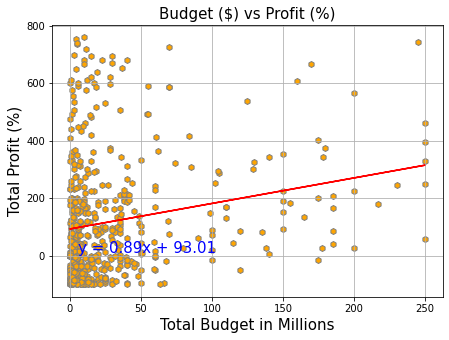

<Figure size 432x288 with 0 Axes>

In [67]:
# Set variables without outlier
budget = csv_no_upper_or_lower_outliers["budget"]/1000000
profit = csv_no_upper_or_lower_outliers["Profit%"]

# Set x and y values _df to extraxt from 
x_values =  budget
y_values =  profit

plt.figure(figsize=(7, 5))

# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Assign labels
plt.title("Budget ($) vs Profit (%)", fontsize=15)
plt.xlabel("Total Budget in Millions", fontsize=15)
plt.ylabel("Total Profit (%)", fontsize=15)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")

# Display
plt.grid()

# Save scatter plot as png
plt.savefig("../Images/budget_profit")

plt.show()
plt.tight_layout()

## Budget vs Profit Results

With a Pearson's correlation of 0.04 we can state that there is a weak correlation between a movies budget to profit. Instead, we see that a large profit can be achived even with a lower budget. If anything, the plot shows a steady increase between 0 to 50 millions.

The r-squared is: 0.0824432377075029
The correlation coefficient between budget and profitability is 0.29


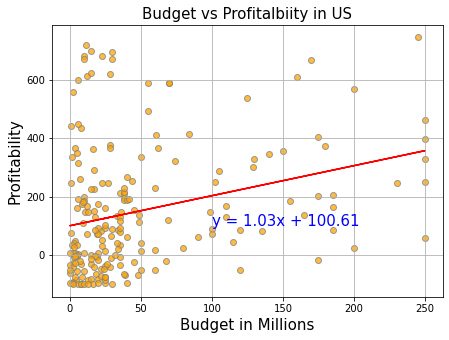

In [57]:
# Create us_df for scatter plot and linear regression using .loc
us_df = csv_no_upper_or_lower_outliers.loc[(csv_no_upper_or_lower_outliers['origin_country']=="US")]

plt.figure(figsize=(7, 5))

# Set variables
x_axis=us_df['budget']/1000000
y_axis=us_df['Profit%']

# Plot scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="gray", alpha=0.75)

# Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_axis = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_axis,"r-")
plt.annotate(line_eq,(100,100),fontsize=15,color="blue")

print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between budget and profitability is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

# Assign label
plt.title("Budget vs Profitalbiity in US", fontsize=15)
plt.xlabel("Budget in Millions", fontsize=15)
plt.ylabel("Profitability", fontsize=15)

# Display
plt.grid()
plt.savefig("../Images/us_budget_profit")
plt.show()

The r-squared is: 0.0040684342145384834
The correlation coefficient between budget and profitability is 0.06


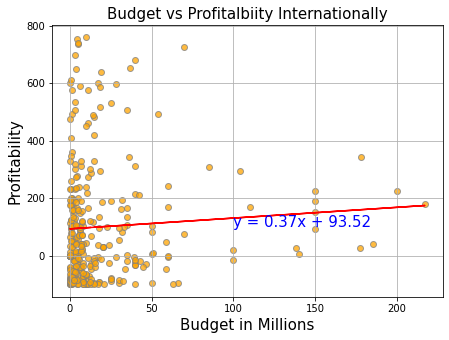

In [59]:
# Create international_df for scatter plot and linear regression using .loc
international_df =csv_no_upper_or_lower_outliers.loc[(csv_no_upper_or_lower_outliers['origin_country']!="US")]

plt.figure(figsize=(7, 5))

# set variables
x_axis = international_df['budget']/1000000
y_axis = international_df['Profit%']

# Scatter plot
plt.scatter(x_axis, y_axis, marker="o", facecolors="orange", edgecolors="gray", alpha=0.75)

# Regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_axis = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_axis,"r-")
plt.annotate(line_eq,(100,100),fontsize=15,color="blue")


print(f"The r-squared is: {rvalue**2}")
print(f"The correlation coefficient between budget and profitability is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

# Assign labels
plt.title("Budget vs Profitalbiity Internationally", fontsize=15)
plt.xlabel("Budget in Millions", fontsize=15)
plt.ylabel("Profitability", fontsize=15)


# Display
plt.grid()
plt.savefig("../Images/international_budget_profit")
plt.show()

The r-squared is: 0.07145601615967595


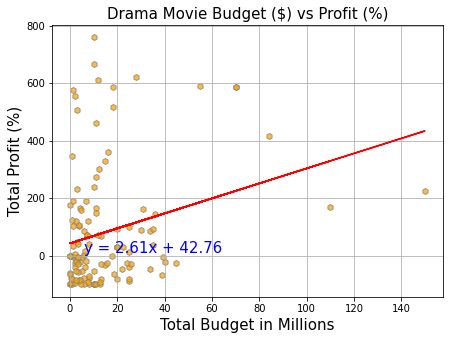

<Figure size 432x288 with 0 Axes>

In [68]:
# Create drama_df for scatter plot and linear reggresssion plot using .loc
drama_df = csv_no_upper_or_lower_outliers.loc[(csv_no_upper_or_lower_outliers["genres"] == "Drama")]

# Set variables
drama_budget = drama_df["budget"]/1000000
drama_profit = drama_df["Profit%"]

# Set x and y values _df to extraxt from 
x_values =  drama_budget
y_values =  drama_profit

plt.figure(figsize=(7, 5))

# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Assign labels
plt.title("Drama Movie Budget ($) vs Profit (%)", fontsize=15)
plt.xlabel("Total Budget in Millions", fontsize=15)
plt.ylabel("Total Profit (%)", fontsize=15)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")

# Display
plt.grid()

# Save scatter plot as png
plt.savefig("../Images/drama_budget_profit")

# Display
plt.show()
plt.tight_layout()

The r-squared is: 0.13064665563263123


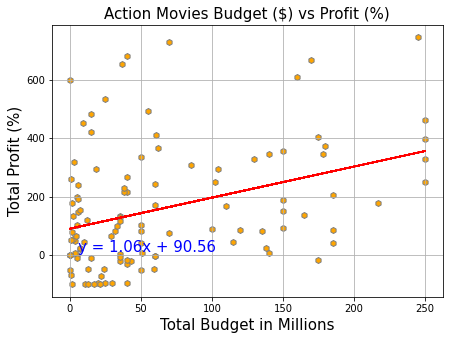

<Figure size 432x288 with 0 Axes>

In [69]:
# Create action_df for scatter plot and linear reggresssion using .loc
action_df = csv_no_upper_or_lower_outliers.loc[(csv_no_upper_or_lower_outliers["genres"] == "Action")]

# Set variables
action_budget = action_df["budget"]/1000000
action_profit = action_df["Profit%"]

# Set x and y values _df to extraxt from 
x_values =  action_budget
y_values =  action_profit

plt.figure(figsize=(7, 5))

# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Assign labels
plt.title("Action Movies Budget ($) vs Profit (%)", fontsize=15)
plt.xlabel("Total Budget in Millions", fontsize=15)
plt.ylabel("Total Profit (%)", fontsize=15)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")

# Display
plt.grid()

# Save scatter plot as png
plt.savefig("../Images/action_budget_profit")

# Display
plt.show()
plt.tight_layout()

The r-squared is: 0.0036051739671917192


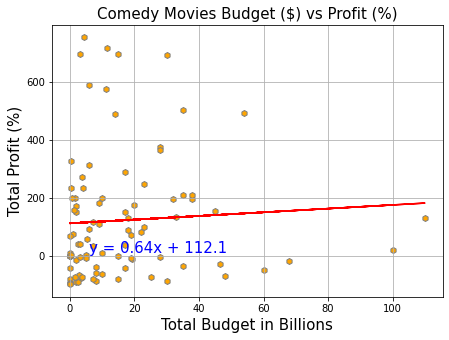

<Figure size 432x288 with 0 Axes>

In [70]:
# Create comedy_df for scatter plot and linear reggresssion using .loc
comedy_df = csv_no_upper_or_lower_outliers.loc[(csv_no_upper_or_lower_outliers["genres"] == "Comedy")]

# Set variables
comedy_budget = comedy_df["budget"]/1000000
comedy_profit = comedy_df["Profit%"]

# Set x and y values _df to extraxt from 
x_values =  comedy_budget
y_values =  comedy_profit

plt.figure(figsize=(7, 5))
# Create scatter plot and linear regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="h", color="orange", edgecolor="gray")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Assign labels
plt.title("Comedy Movies Budget ($) vs Profit (%)", fontsize=15)
plt.xlabel("Total Budget in Billions", fontsize=15)
plt.ylabel("Total Profit (%)", fontsize=15)

# Retrieve r-squared value squared 
print(f"The r-squared is: {rvalue**2}")

# Display
plt.grid()

# Save scatter plot as png
plt.savefig("../Images/comedy_budget_profit")

plt.show()
plt.tight_layout()

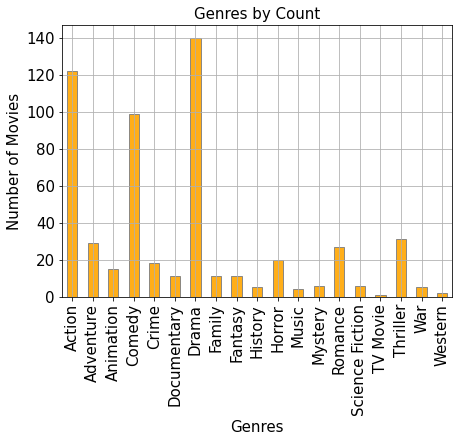

<Figure size 432x288 with 0 Axes>

In [71]:
# Create bar chart using genres_chart 
genres_chart = genres_count.plot(kind='bar', color="orange", edgecolor="gray", figsize=(7, 5), fontsize=15, alpha=0.90)

# Assign labels
genres_chart.set_title("Genres by Count", fontsize=15)
genres_chart.set_xlabel("Genres", fontsize=15)
genres_chart.set_ylabel("Number of Movies", fontsize=15)

# Add grid
plt.grid()

# save plot
plt.savefig("../Images/genres_by_count_png")

# Display chart with tight_layout()
plt.show()
plt.tight_layout()

## Genres by Count

Most popular movies being made in our study were Drama with 140 movies, Action with 122 movies, and Comedy with 99 movies. The least popular were TV Movies with 1 movie, Western with 2 movies, and Music with 4 movies.